#### Load libraries

In [1]:
%matplotlib inline
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np

#### Create data

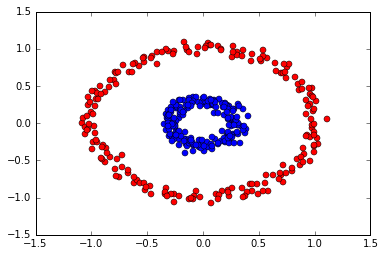

In [2]:
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)
reds = y == 0
blues = y == 1
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")

The “classic” PCA approach described above is a linear projection technique that works well if the data is linearly separable. However, in the case of linearly inseparable data, a nonlinear technique is required if the task is to reduce the dimensionality of a dataset.

Below, if we try to project data on two principal components. 

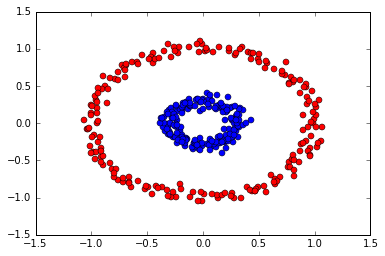

In [3]:
pca = PCA(2, 'arpack')
X_pca = pca.fit_transform(X)
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")

Instead, we can use Kernel PCA to make a nonlinear transformation. There are different available kernels in sklearn, with documentation http://scikit-learn.org/stable/modules/metrics.html. 

* **linear**. The same as PCA. 
* **poly**. Polynomial kernel with 3 parameters to tune: gamma, coef0, and degree. $k(x,y) = (\gamma x^Ty + c_0)^d$
* **rbf**. Radial Basis Function or Gaussian. $k(x,y) = \exp(-\gamma ||x-y||^2)$
* **sigmoid**. Sigmoid or Hyperbolic tangent kernel. $k(x,y) = \tanh(\gamma x^Ty + c_0)$
* **cosine**. $k(x,y) = \frac{xy^T}{||x||||y||}$
* **precomputed**. Custom function provided as input. 

Choice of kernel depends on the domain and is often selected via cross-validation or domain expertise. Parameters for each particular kernel are selected using cross validation. 

From [here](https://www.quora.com/How-does-one-decide-on-which-kernel-to-choose-for-an-SVM-RBF-vs-linear-vs-poly-kernel):

>If you are classifying images, you can try a RBF Kernel--because the RBF Kernel selects solutions that are smooth (this can be easily shown in frequency space...I started a blog to explain...bear with me as I proof it:
http://charlesmartin14.wordpress...
)

>If you think your solutions are naturally sparse, then pick an L1-regularizer.   

>If you only have a small set of labels but lots of unlabeled data, then you might try a Manifold Regularizer (i.e. Transductive SVM), with or without a non-linear Kernel

>If you have text, then don't apply RBF. That makes no mathematical sense.

>If you data lives on a graph, you might want a Diffusion Kernel.

>if you can't find a Kernel or Regularizer that represents your problem, then build the features yourself, and run a L1-SVM.

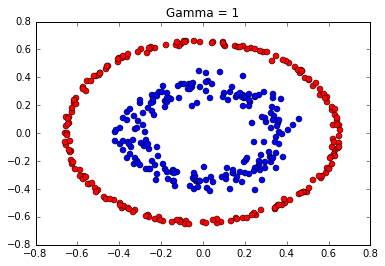

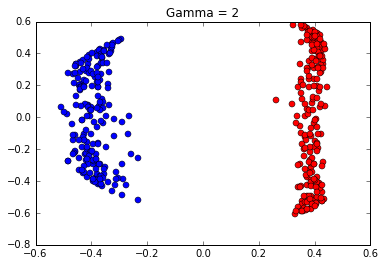

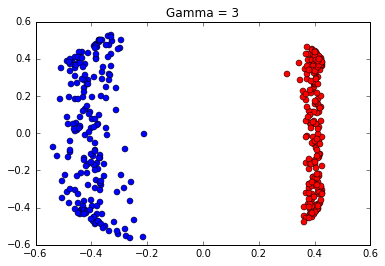

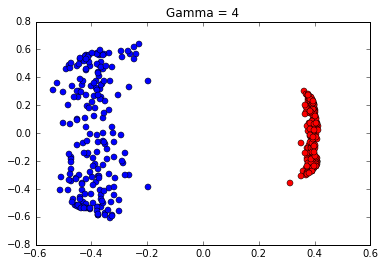

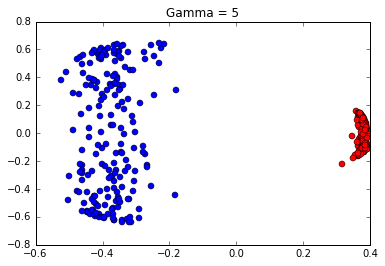

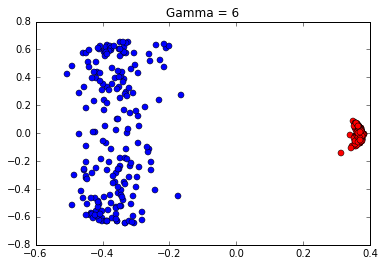

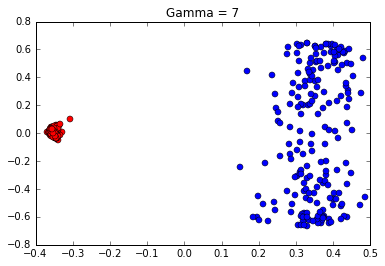

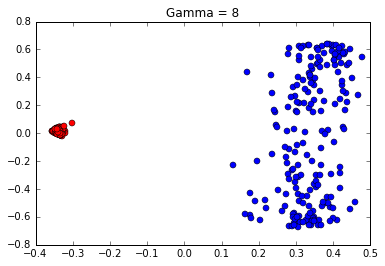

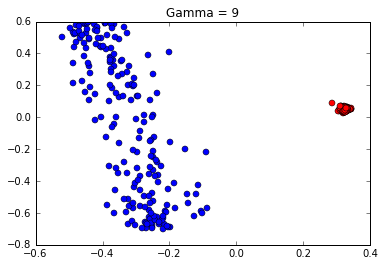

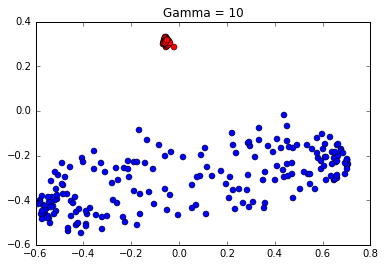

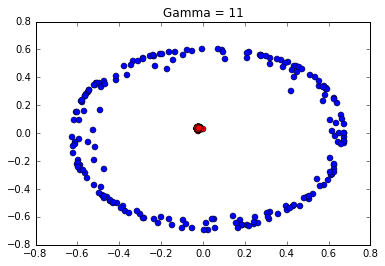

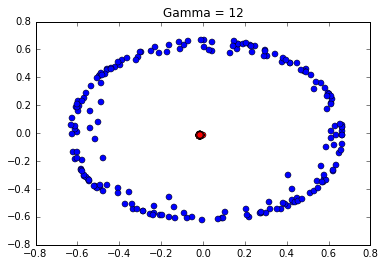

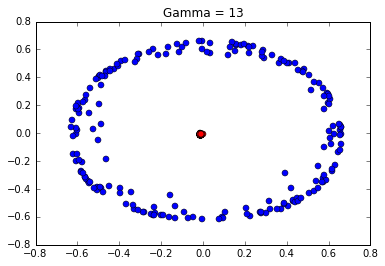

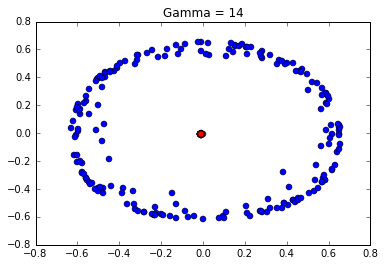

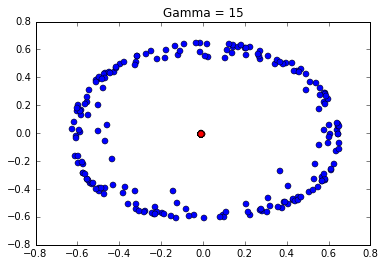

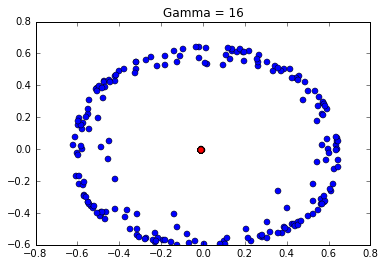

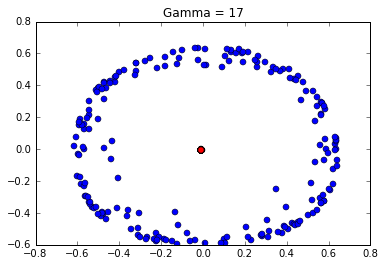

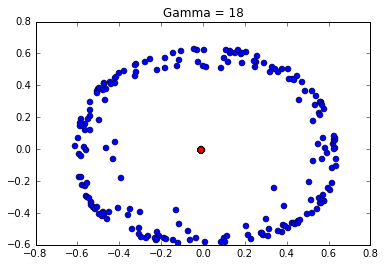

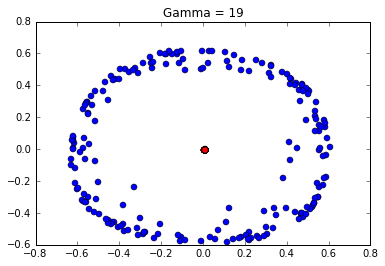

In [4]:
for i in range(1, 20):
    kpca = KernelPCA(kernel="rbf", gamma=i)
    X_kpca = kpca.fit_transform(X) 
    plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
    plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
    plt.title('Gamma = {}'.format(i))
    plt.show()

#### Project data into first principal component

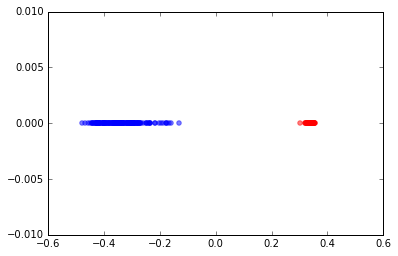

In [5]:
kpca = KernelPCA(1, kernel="rbf", gamma=8)
X_kpca = kpca.fit_transform(X) 
plt.scatter(X_kpca[reds], np.zeros((X_kpca[reds].shape[0],1)), color='red', alpha=0.5)
plt.scatter(X_kpca[blues], np.zeros((X_kpca[blues].shape[0],1)), color='blue', alpha=0.5)

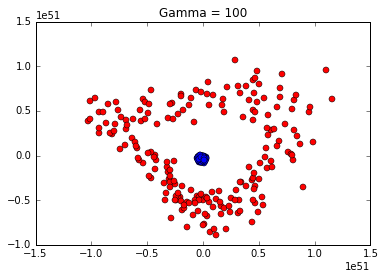

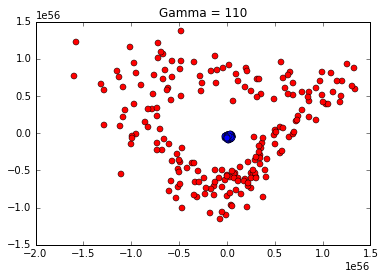

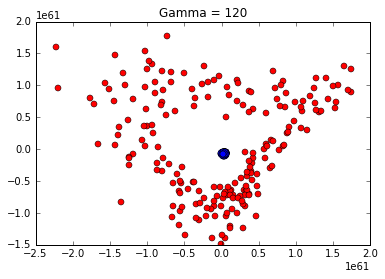

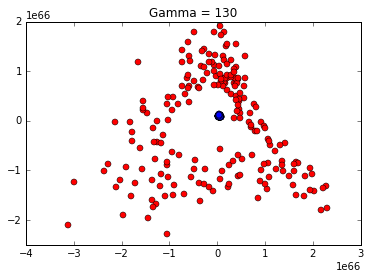

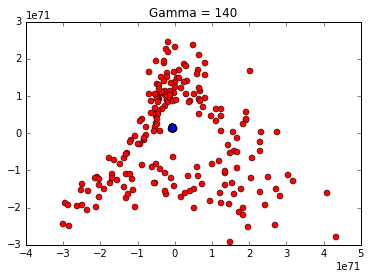

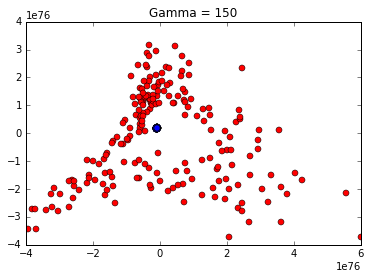

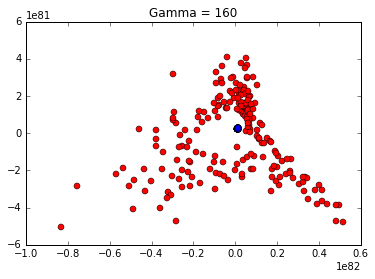

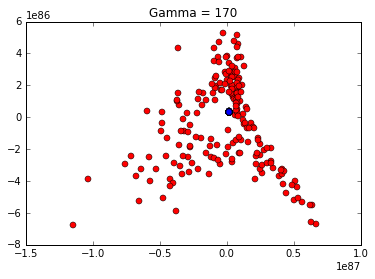

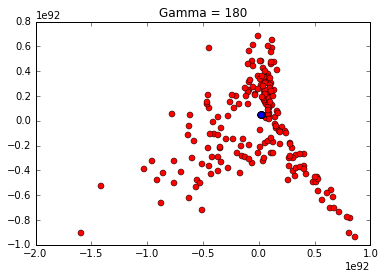

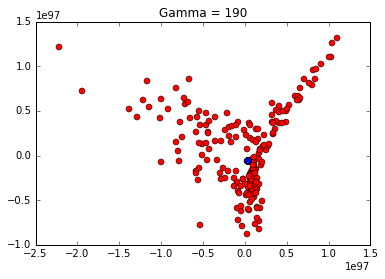

In [6]:
for i in range(100, 200, 10):
    kpca = KernelPCA(kernel="poly", degree=i, coef0=10)
    X_kpca = kpca.fit_transform(X) 
    plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
    plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
    plt.title('Gamma = {}'.format(i))
    plt.show()

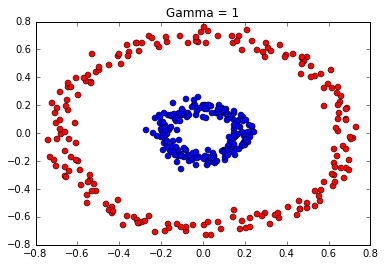

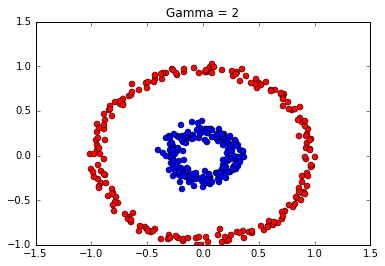

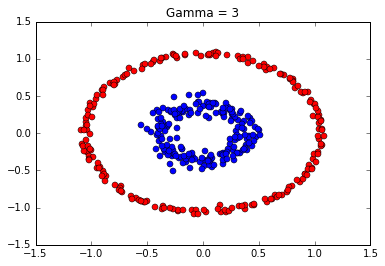

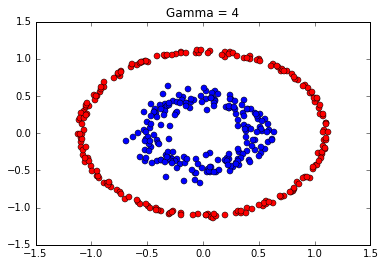

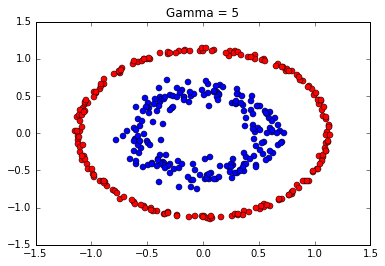

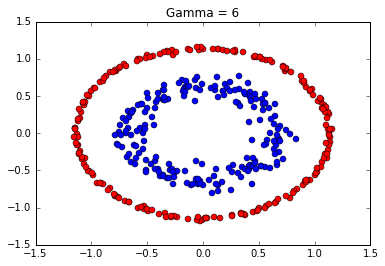

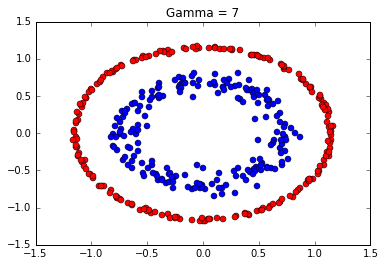

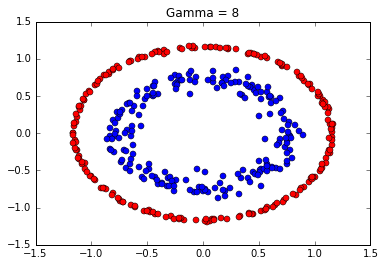

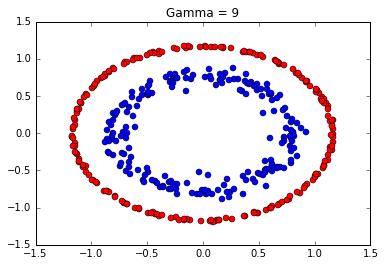

In [7]:
for i in range(1, 10):
    kpca = KernelPCA(kernel="sigmoid", gamma = i)
    X_kpca = kpca.fit_transform(X) 
    plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
    plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
    plt.title('Gamma = {}'.format(i))
    plt.show()

#### Projecting new data
When we computed the eigenvectors αα of the centered kernel matrix, those values were actually already the projected datapoints onto the principal component axis $g$.

If we want to project a new data point $x$ onto this principal component axis, we’d need to compute $\varphi (x)^Tg$.

Fortunately, also here, we don’t have to compute $\varphi (x)^Tg$ explicitely but use the kernel trick to calculate the RBF kernel between the new data point and every data point $j$ in the training dataset:
$\varphi (x)^Tg=\sum_j \alpha_j \varphi (x) \varphi (x_j)^T = \sum_j \alpha_j k(x, x_j)$
and the eigenvectors $\alpha$ and eigenvalues $\lambda$ of the kernel matrix $K$ satisfy the equation $K\alpha = \lambda\alpha$. we need to normalize the eigenvector by the corresponding eigenvalue.

In [8]:
kpca = KernelPCA(kernel="rbf", gamma = 8)
kpca.fit(X)
# project new data on principal components
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

x_new = [-0.5, 0.5]
x_proj = project_x(x_new, X, gamma=8, alphas = kpca.alphas_, lambdas = kpca.lambdas_)
print x_proj.shape
Xtr = kpca.transform(X)
print Xtr.shape

(382L,)
(400L, 382L)


#### Inverse data transformation

In [9]:
kpca= KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma = 8)
X_kpca = kpca.fit_transform(X)
X_orig = kpca.inverse_transform(X_kpca)
print X[0]
print X_orig[0]

[ 0.06771053  0.25269883]
[ 0.06619995  0.24772812]
